# Trait correlations study 1 analysis

Import packages:

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.spatial.distance import squareform, pdist
from scipy.stats import rankdata, pearsonr
import statsmodels.api as sm
from statsmodels.stats.mediation import Mediation
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

def vec_rescale(vec, new_min, new_max):
    '''
    Rescale vector to new min and max value
    '''
    return (new_max - new_min) / ( max(vec) - min(vec) ) * (vec - max(vec)) + new_max

## Data prep

Load in raw data and transform into similarity vectors:

In [36]:
# TL1 Face task - Face Judgment DM
faces_raw = pd.pivot_table(pd.read_csv('./faces2_raw.csv'), 
                       index = 'Picture', 
                       columns = 'Name', 
                       values = 'Rating', 
                       aggfunc = np.mean)
facesDM = 1 - pdist(faces_raw.transpose(),metric='correlation')

# TraitCorrelations1 task - Subjective DM 
subjective_raw = pd.pivot_table(pd.read_csv('./traitcorr2_raw.csv'), 
                       index = 'trait_pair',
                       values = 'similarity', 
                       aggfunc = np.mean)
subjectiveDM = subjective_raw['similarity']

# Combine data
fso = pd.DataFrame([ facesDM, subjectiveDM ],
                  ['Faces','Subjective']).transpose() 

Plot DMs:

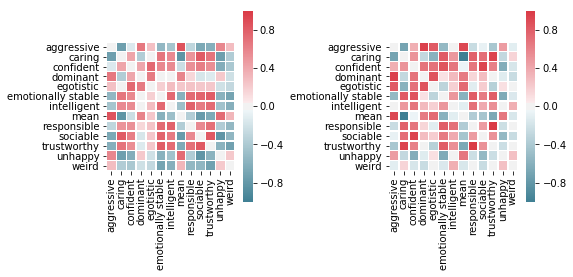

In [38]:
# plot settings
fig, axs = plt.subplots(ncols=2,figsize=(8,4))
labels = faces_raw.columns.values
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap( pd.DataFrame(squareform(fso['Faces']), columns=labels, index=labels),
            cmap=cmap, center=0, square=True, linewidths=.5, vmin=-1, vmax=1, ax=axs[0] )
sns.heatmap( pd.DataFrame(squareform(vec_rescale(fso['Subjective'],-1,1)), columns=labels, index=labels),
            cmap=cmap, center=0, square=True, linewidths=.5, vmin=-1, vmax=1, ax=axs[1] )
plt.tight_layout()

## RSA

Run analyses and plot (plots not rank ordered).

('Faces:Subjective = ', SpearmanrResult(correlation=0.82321846453727254, pvalue=2.2722329146124675e-20))


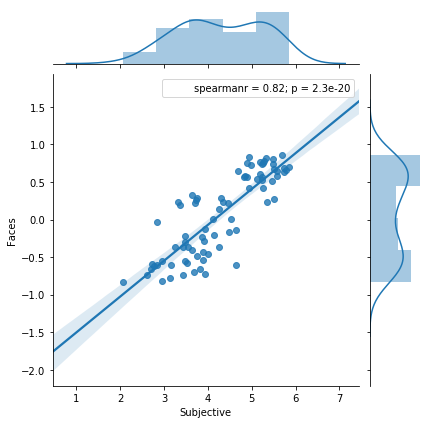

In [39]:
print( 'Faces:Subjective = ', 
      spearmanr(fso['Subjective'],fso['Faces']) )
sns.jointplot("Subjective", "Faces", data=fso, kind="reg", stat_func=spearmanr)

# Do these effects generalize to other stimuli?

Here we test generalization of our hypothesis on Oosterhoff & Todorov's 2008 data - trait space of face judgments of Karolinska face database stim.

## Data prep

Must cut 'egotistic' since not in his public dataset.

In [79]:
# Todorov karolinska data
todorov_raw = pd.read_csv('./todorov_karolinska.csv',index_col='stimID')
todorovDM = 1 - pdist(todorov_raw.transpose(),metric='correlation')

# Faces DM, drop Egotistic
faces_raw_dropego = faces_raw.drop('egotistic',axis=1)
T_facesDM = 1 - pdist(faces_raw_dropego.transpose(),metric='correlation')

# Subjective DM, drop Egotistic
subjective_egotistic = [i for i,index in enumerate(list(subjective_raw.index)) if 'egotistic' in index ]
subjective_raw_dropego = subjective_raw.drop(subjective_raw.index[subjective_egotistic])
T_subjectiveDM = subjective_raw_dropego['similarity']

T_fso = pd.DataFrame([ todorovDM, T_facesDM, T_subjectiveDM ],
                  ['Todorov','T_Faces','T_Subjective']).transpose() 

Plot DMs.

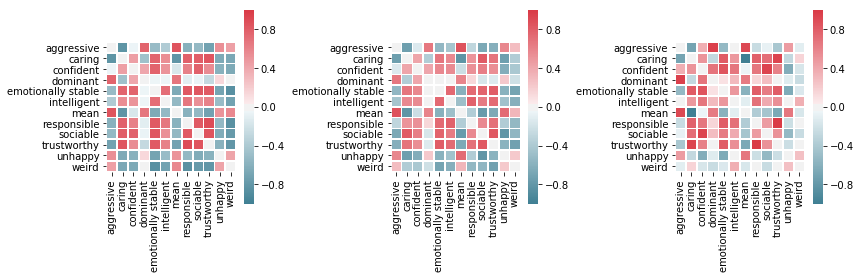

In [78]:
# plot settings
fig, axs = plt.subplots(ncols=3,figsize=(12,4))
labels = faces_raw_dropego.columns.values
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap( pd.DataFrame(squareform(T_fso['Todorov']), columns=labels, index=labels),
            cmap=cmap, center=0, square=True, linewidths=.5, vmin=-1, vmax=1, ax=axs[0] )
sns.heatmap( pd.DataFrame(squareform(T_fso['T_Faces']), columns=labels, index=labels),
            cmap=cmap, center=0, square=True, linewidths=.5, vmin=-1, vmax=1, ax=axs[1] )
sns.heatmap( pd.DataFrame(squareform(vec_rescale(T_fso['T_Subjective'],-1,1)), columns=labels, index=labels),
            cmap=cmap, center=0, square=True, linewidths=.5, vmin=-1, vmax=1, ax=axs[2] )
plt.tight_layout()

## RSA

Does our subjective trait expectancy model predict the trait space of Oosterhoff & Todorov's 2008 Karolinska face data?

Also, how redundant is our data of Chicago Face Database stim to Todorov' Karolinska face data (also including female targets)?

('Todorov Faces:Subjective = ', SpearmanrResult(correlation=0.84078786901263325, pvalue=1.0307092248995559e-18))
('Todorov Faces:Faces = ', SpearmanrResult(correlation=0.93182340048011703, pvalue=7.1468670819387043e-30))


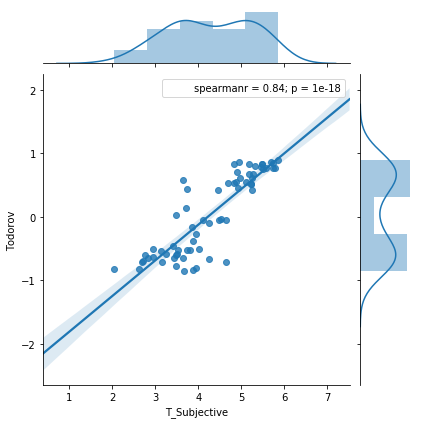

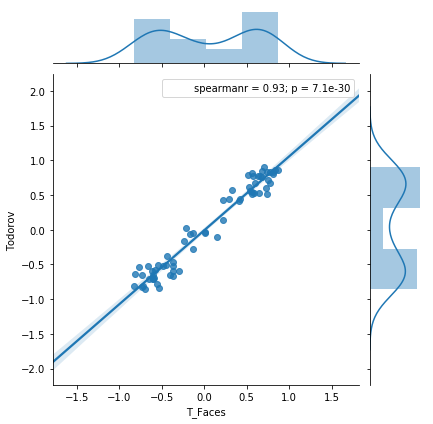

In [110]:
print( 'Todorov Faces:Subjective = ', 
      spearmanr(T_fso['T_Subjective'],T_fso['Todorov']) )
sns.jointplot("T_Subjective", "Todorov", data=T_fso, kind="reg", stat_func=spearmanr)

print( 'Todorov Faces:Faces = ', 
      spearmanr(T_fso['T_Faces'],T_fso['Todorov']) )
sns.jointplot("T_Faces", "Todorov", data=T_fso, kind="reg", stat_func=spearmanr)